## Model Representation

### Goals

In this lab we will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

## Tools
In this lab we will use the following tools:
- Numpy, a popular library for scientific computing in Python
- Matplotlib, a popular library for plotting data in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

# Problem Statement

<img align="left" src="../assets/images/trainingData.png"    style=" width:380px; padding: 10px;  " />

This lab will use a simple dataset with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 sqft sold for \\$500,000. These two points will consitute our *data or training set*. n this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft) | Price (1000s of dollars) |
| --------------- | ------------------------ |
| 1.0            | 300                      |
| 2.0            | 500                      |

You would like to fit a linear agression model (shown above as the blue straight line) through these two points, you can then predict the other houses - say, a house with 1200 sqft.

Run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the output variable (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


### Number of training examples `m`
We will use `m` to denote the number of training examples. Numpy arrays have a `.shape` paremeter `x_train.shape` returns a python tuple with an entry to each dimension. `x_train.shape` is the length of the array of examples as shown below.

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training example is: 2


One can also use the Python `len()` funstion as shown below.

In [4]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [6]:
i = 0  # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")


(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses(the default is blue dots)

You can use other funtions in the `matplotlib` library to set the title and labels to display

<function matplotlib.pyplot.show(close=None, block=None)>

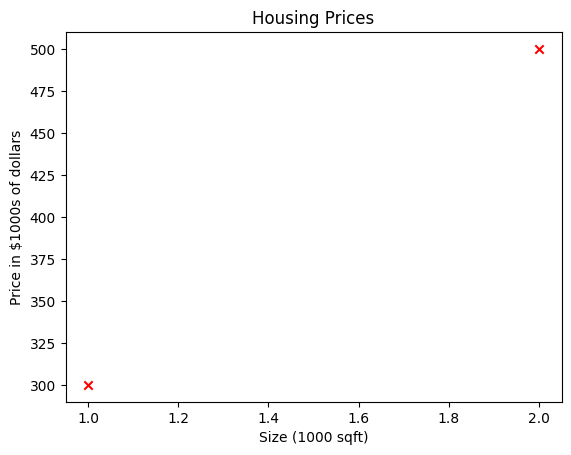

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Housing Prices")

# Set the y-axis label
plt.ylabel('Price in $1000s of dollars')

# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show

### Model Function
<img align="left" src="../assets/images/model.png"     style=" width:380px; padding: 10px; " >
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is a how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

**Node: You can come back to this cell to adjust the model's w and b parameters**

In [8]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's computer the value of $f_(w,b)(x^[(i)])$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`
for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwiedly and repetitive. So instead, we can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note:** The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of share (m,), `(scalar)` describes an argument without dimensions, just a magnitude.

> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries.

In [11]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

Now let's call the `compute_model_output` function and plot the output

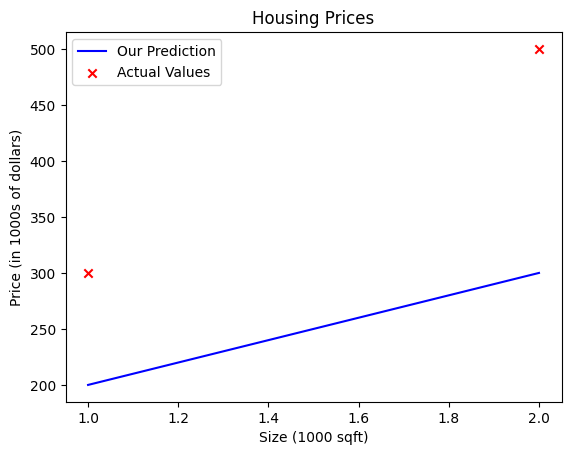

In [13]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that filter our data.

### Challenge
Try Experimenting with different vaues of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can see your mouse to click the green "Hints" below to reveal some hints for choosing b and w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

### Pridiction
Now, that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.

In [14]:
w = 200
b = 100
x_i = 1.2
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft: .0f} thousand dollars")

$ 340 thousand dollars


# Congratulations!
In this lab we have learned:
- Linear regression builds a model which establishes a relationship between features and targets
    - In the example above, the feature was house size and target was house price
    - For simple linear regression, the model has two parameters $w$ and $b$ whose values are `fit` using *training data*.
    - Once a model's parameters have been determined, the model can be used to make predictins on novel data.